In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
data = pd.read_csv('student_scores.csv')
data_arr = data.values
X = data_arr[:,0]
y = data_arr[:,1]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

def norm(x):
    min_max_scaler=MinMaxScaler()
    X_scaled=min_max_scaler.fit_transform(x)
    return X_scaled

def cost(x,theta,y):
    temp1 = (np.dot(x,theta)-y).reshape(1,len(x[:,0]))
    cost = []
    for p in range(len(theta)):
        tempx = x[:,p]
        temp2 = np.dot(temp1,tempx)
        tempsum = temp2.sum()
        cost.append(tempsum/(2*len(y)))
    return np.array(cost)
def gradient_descent(alpha, x,y,norma,max_iter=1500):
    if(norma==True):
        x = norm(x.reshape(-1,1))
        y = norm(y.reshape(-1,1))
    theta = np.random.rand(x.shape[1]+1,1)
    temp = np.ones(len(x))
    y = np.array(y)
    x = np.vstack((temp.T,x.T)).T
    y = y.reshape(len(y),1)
    for i in range(max_iter):
        costval = cost(x,theta,y)
        theta[0]= theta[0]-alpha*costval[0]
        theta[1] = theta[1]-alpha*costval[1]
    return theta

learning_rate = [0.0001,0.0002, 0.0004,0.0005]
for i in learning_rate:
    print("Learning rate = ", i)
    print("Theta = ", gradient_descent(i, X,y,True))

Learning rate =  0.0001
Theta =  [[0.86849391]
 [0.71761844]]
Learning rate =  0.0002
Theta =  [[0.48461575]
 [0.55259503]]
Learning rate =  0.0004
Theta =  [[0.32657131]
 [0.87823669]]
Learning rate =  0.0005
Theta =  [[0.52807283]
 [0.29254113]]


5
[[1.         1.         1.         1.         1.        ]
 [0.38095238 1.         0.         0.66666667 0.76190476]]
Mean squared error 0.1142495761570514
ds (5, 1)
dsds (5, 1)


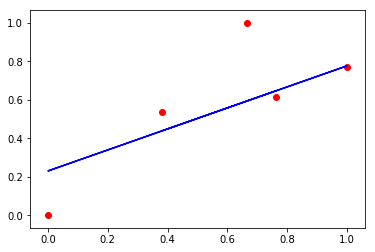

In [5]:
#prediction
data = pd.read_csv('student_scores.csv')
data_arr = data.values
X = data_arr[:,0]
y = data_arr[:,1]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

theta = gradient_descent(0.1, X_train,y_train, True,100)
X_test = norm(X_test.reshape(-1,1))
y_test = norm(y_test.reshape(-1,1))
temp = np.ones(len(X_test))
print(len(X_test))
X_test = np.vstack((temp.T, X_test.T))
print(X_test)
y_pred = np.dot(X_test.T, theta)
mse = (1/(len(X_test))) * np.square(y_pred-y_test).sum()
print("Mean squared error",mse)
x_val = X_test[1,:].reshape(-1,1)
print("ds",x_val.shape)
print("dsds",y_test.shape)
plt.scatter(x_val,y_test, c='red')
plt.plot(x_val, y_pred,c='blue')
plt.show()
theta_val = theta